# Descriptive And Inferential Statistics

## Introduction to Basic Statistics

#### Import Libaries

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt


#### Extract Data

In [13]:
spotData = yf.download(tickers='^NSEI', start=date(2021,1,1), end=date.today(), auto_adjust=False, multi_level_index=False)['Adj Close'].fillna(method="bfill")
spotReturns = spotData.pct_change().iloc[1:]

[*********************100%***********************]  1 of 1 completed
C:\Users\dines\AppData\Local\Temp\ipykernel_13644\3418113216.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spotData = yf.download(tickers='^NSEI', start=date(2021,1,1), end=date.today(), auto_adjust=False, multi_level_index=False)['Adj Close'].fillna(method="bfill")


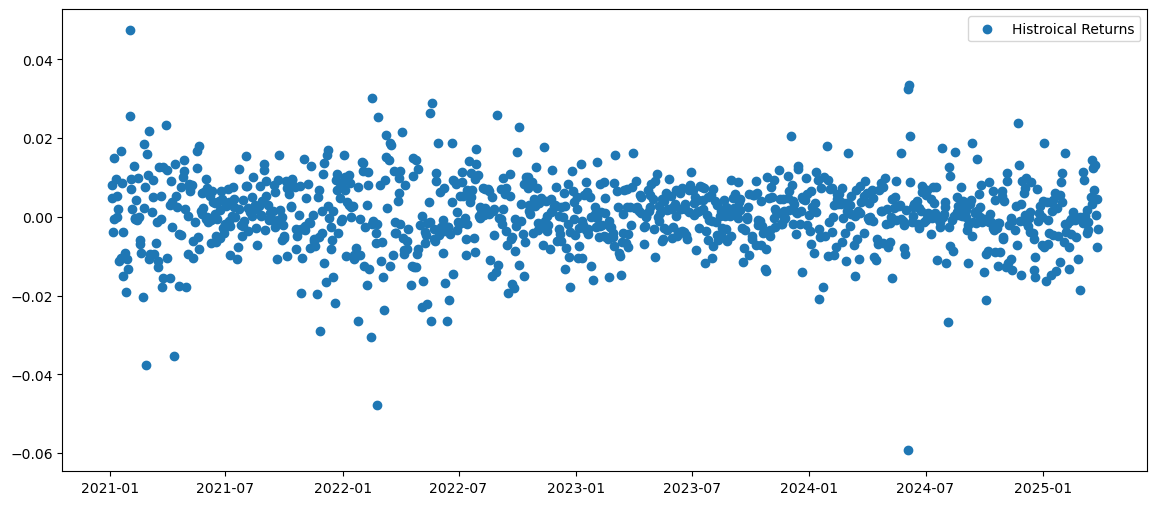

In [15]:
plt.figure(figsize=(14,6))
plt.scatter(x = spotReturns.index, y = spotReturns.values , label = 'Histroical Returns')
plt.legend()
plt.show()

#### Univariate Analysis
        '(Analyzes a single variable)'

#### Measures of Central Tendency

#### 1. Mean

#### 1.1 Arthmetic Mean

In [23]:
print(spotReturns.mean())

0.0005354265889217491


In [25]:
print(np.mean(spotReturns))

0.0005354265889217491


In [27]:
sum(spotReturns) / len(spotReturns)

0.0005354265889217491

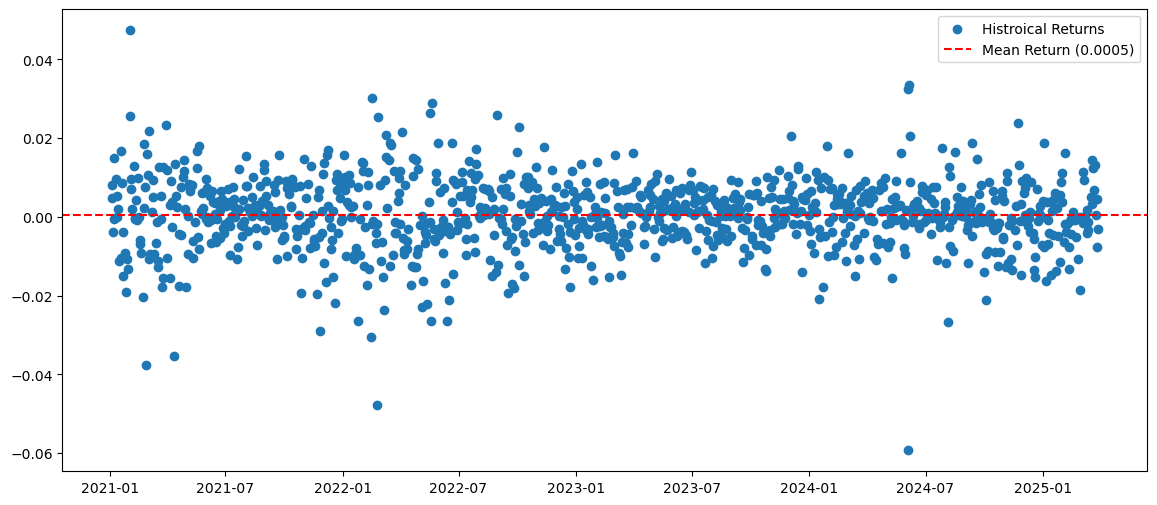

In [32]:
plt.figure(figsize=(14,6))
plt.scatter(x = spotReturns.index, y = spotReturns.values , label = 'Histroical Returns')
plt.axhline(y=spotReturns.mean(), linestyle='--', color='r',
            label=f'Mean Return ({round(spotReturns.mean(), 4)})')
plt.legend()
plt.show()

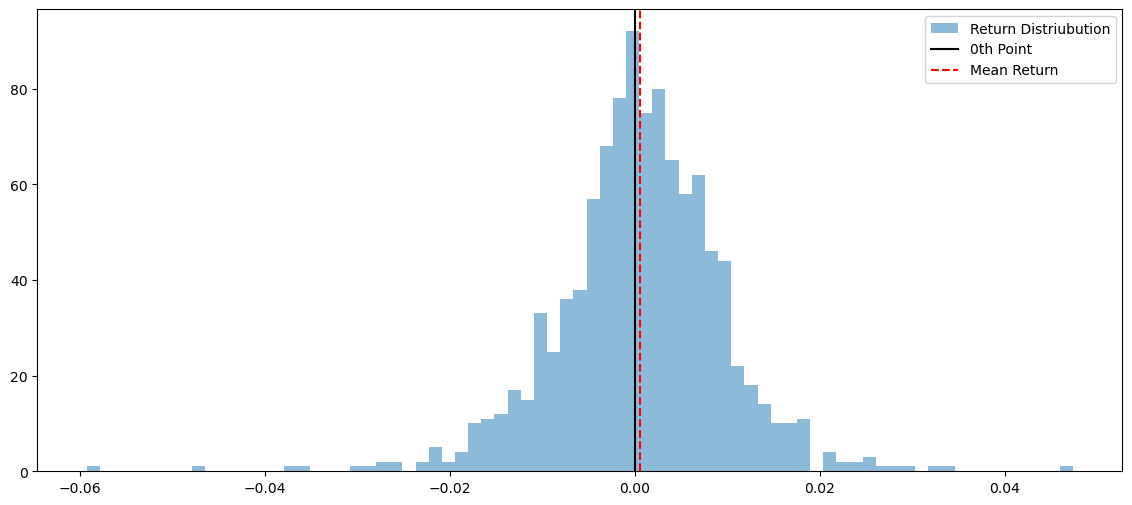

In [40]:
plt.figure(figsize=(14,6))
plt.hist(spotReturns, bins = 75, alpha = 0.5, label = 'Return Distriubution')
plt.axvline(0.0, color='k',label='0th Point')
plt.axvline(spotReturns.mean(), linestyle='--', color='r',label='Mean Return')
plt.legend()
plt.show()


#### 1.2 Geometric Mean

        10%, 20%, 30% over 3-Year Period.
        GM = (1.1 * 1.2 * 1.3) ** (1/3)

In [47]:
rfactor = 1
for r in spotReturns:
    rfactor = rfactor * (1 + r)
gmean = rfactor ** (1/len(spotReturns)) - 1 
print(gmean)

0.0004943395133538697


In [55]:
print((1 + spotReturns).cumprod().tail(1).values[0] ** (1 / len(spotReturns)) - 1)

0.0004943395133538697


In [57]:
print(stats.gmean(1 + spotReturns) - 1)

0.0004943395133538697


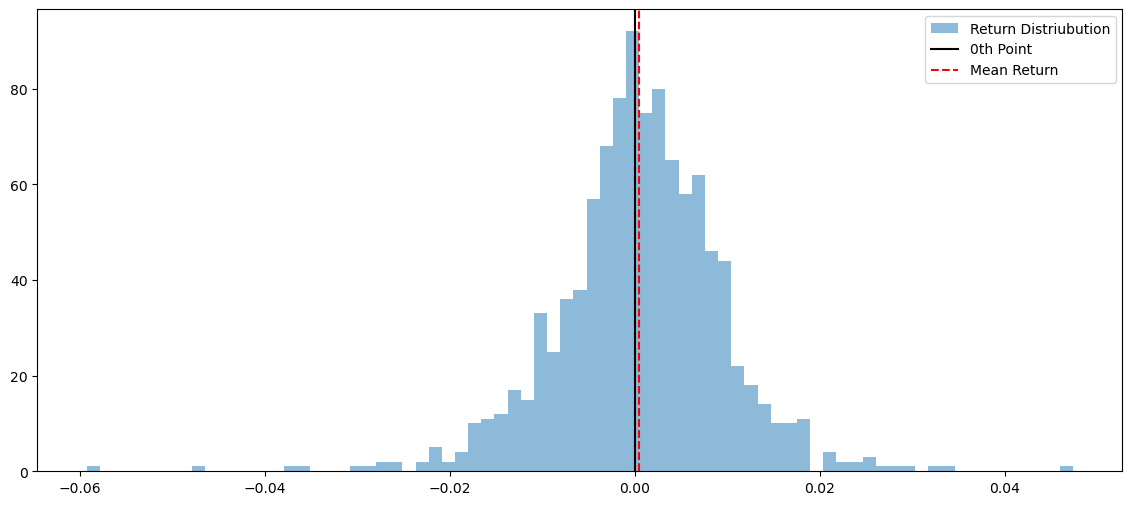

In [59]:
plt.figure(figsize=(14,6))
plt.hist(spotReturns, bins = 75, alpha = 0.5, label = 'Return Distriubution')
plt.axvline(0.0, color='k',label='0th Point')
plt.axvline(gmean, linestyle='--', color='r',label='Mean Return')
plt.legend()
plt.show()


#### 2. Meadian

In [65]:
print(spotReturns.median())

0.0006826699360520383


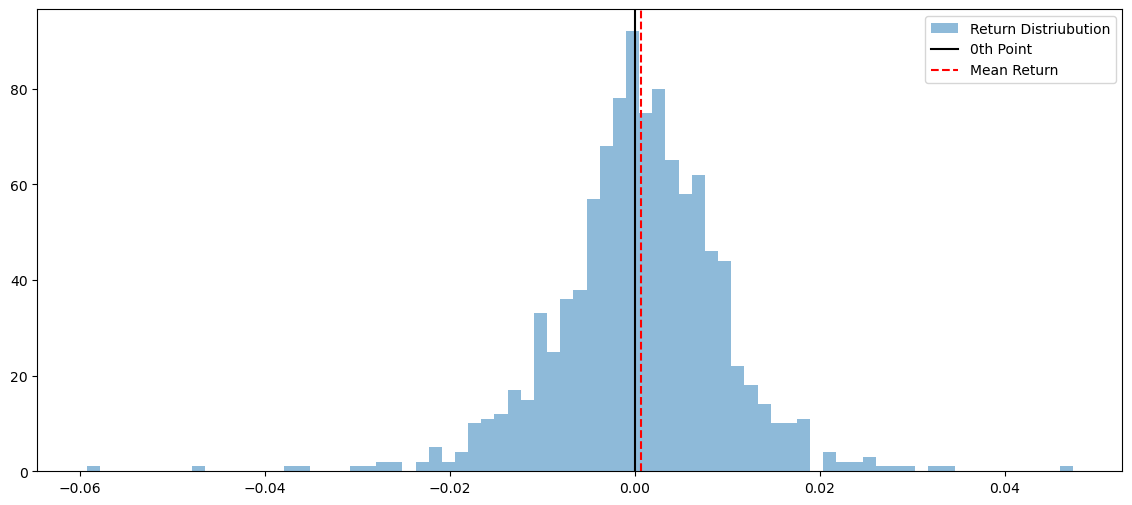

In [67]:
plt.figure(figsize=(14,6))
plt.hist(spotReturns, bins = 75, alpha = 0.5, label = 'Return Distriubution')
plt.axvline(0.0, color='k',label='0th Point')
plt.axvline(spotReturns.median(), linestyle='--', color='r',label='Mean Return')
plt.legend()
plt.show()


#### 3. Mode

In [70]:
print(spotReturns.mode())

0      -0.059294
1      -0.047781
2      -0.037636
3      -0.035326
4      -0.030616
          ...   
1042    0.028891
1043    0.030259
1044    0.032542
1045    0.033624
1046    0.047424
Name: Adj Close, Length: 1047, dtype: float64


#### Measures of Variablility / Dispersion

#### 1. Range

In [74]:
print(min(spotReturns))


-0.05929359941641077


In [76]:
print(max(spotReturns))

0.047423511101338356


In [82]:
print(max(spotReturns) - min(spotReturns))

0.10671711051774913


In [84]:
spotReturns.max() - spotReturns.min()

0.10671711051774913

In [86]:
np.max(spotReturns) - np.min(spotReturns)

0.10671711051774913

#### 2. Variance

In [106]:
print(round(sum((ret - spotReturns.mean())**2 for ret in spotReturns) / (len(spotReturns)-1) , 4))

0.0001


In [95]:
print(round(spotReturns.var(),4))

0.0001


In [97]:
print(round(np.var(spotReturns),4))

0.0001


#### 3. Standard Deviation

In [115]:
print((sum((ret - spotReturns.mean())**2 for ret in spotReturns) / (len(spotReturns)-1)) ** 0.5)

0.009058804693277614


In [110]:
print(spotReturns.std())

0.009058804693277614


#### Add-On : Describe

In [118]:
print(spotReturns.describe())

count    1047.000000
mean        0.000535
std         0.009059
min        -0.059294
25%        -0.004183
50%         0.000683
75%         0.005923
max         0.047424
Name: Adj Close, dtype: float64


#### 4. Skewness

In [121]:
spotReturns.skew()

-0.4304855533203358

#### 5. Kurtosis

In [124]:
spotReturns.kurt()

3.9571223404164364